In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])
cm = 1/2.54

In [3]:
pose_1 = jnp.load('data/pose_1.npz')
pose_2 = jnp.load('data/pose_2.npz')
pose_3 = jnp.load('data/pose_3.npz')
pose_4 = jnp.load('data/pose_4.npz')
poses = [pose_1, pose_2, pose_3, pose_4]
pose_1.files

['joints',
 'geo_vals',
 'rot_errors',
 'pos_errors',
 'mass_vals',
 'jac_vals',
 'qdot_vals',
 'grav_vals',
 'pose_vals',
 'cart_vel_val',
 'momenta']

The next three plots are for the geodesic errors of the end-effector. They are the total geodesic, the position error and the rotation error.

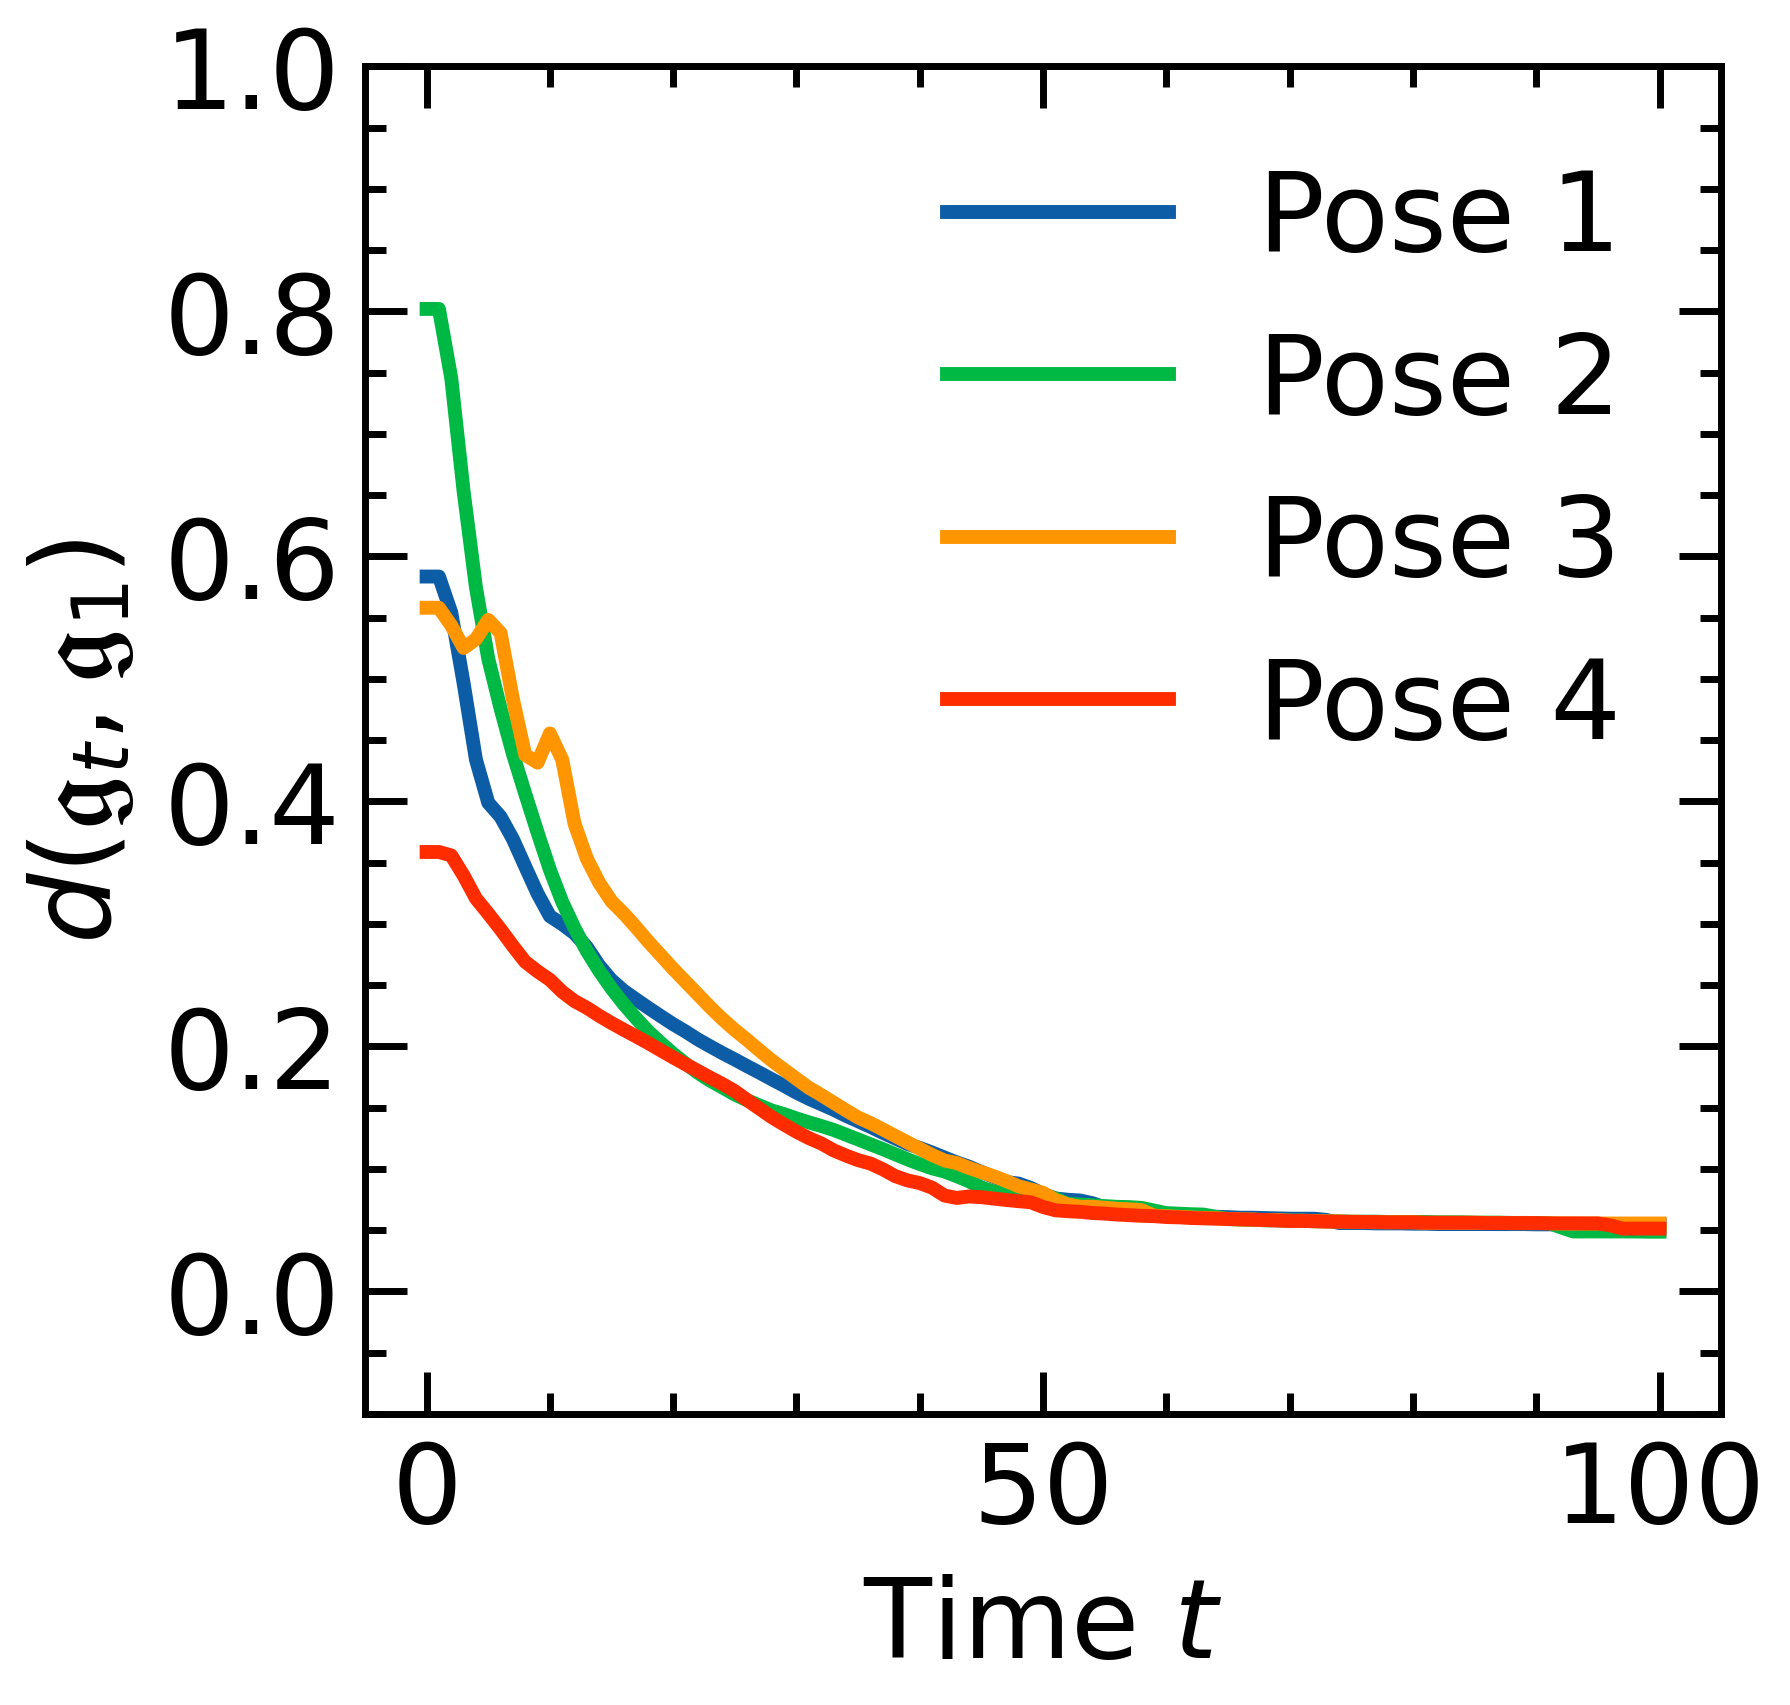

In [3]:
pose_1_geo_vals = pose_1['geo_vals'][0:101]
pose_2_geo_vals = pose_2['geo_vals'][0:101]
pose_3_geo_vals = pose_3['geo_vals'][0:101]
pose_4_geo_vals = pose_4['geo_vals'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.1, 1])
plt.xlabel('Time $t$')
plt.ylabel('$d(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_geo_vals)
plt.plot(pose_2_geo_vals)
plt.plot(pose_3_geo_vals)
plt.plot(pose_4_geo_vals)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
plt.savefig('geodesic.png', dpi=500)
plt.show()

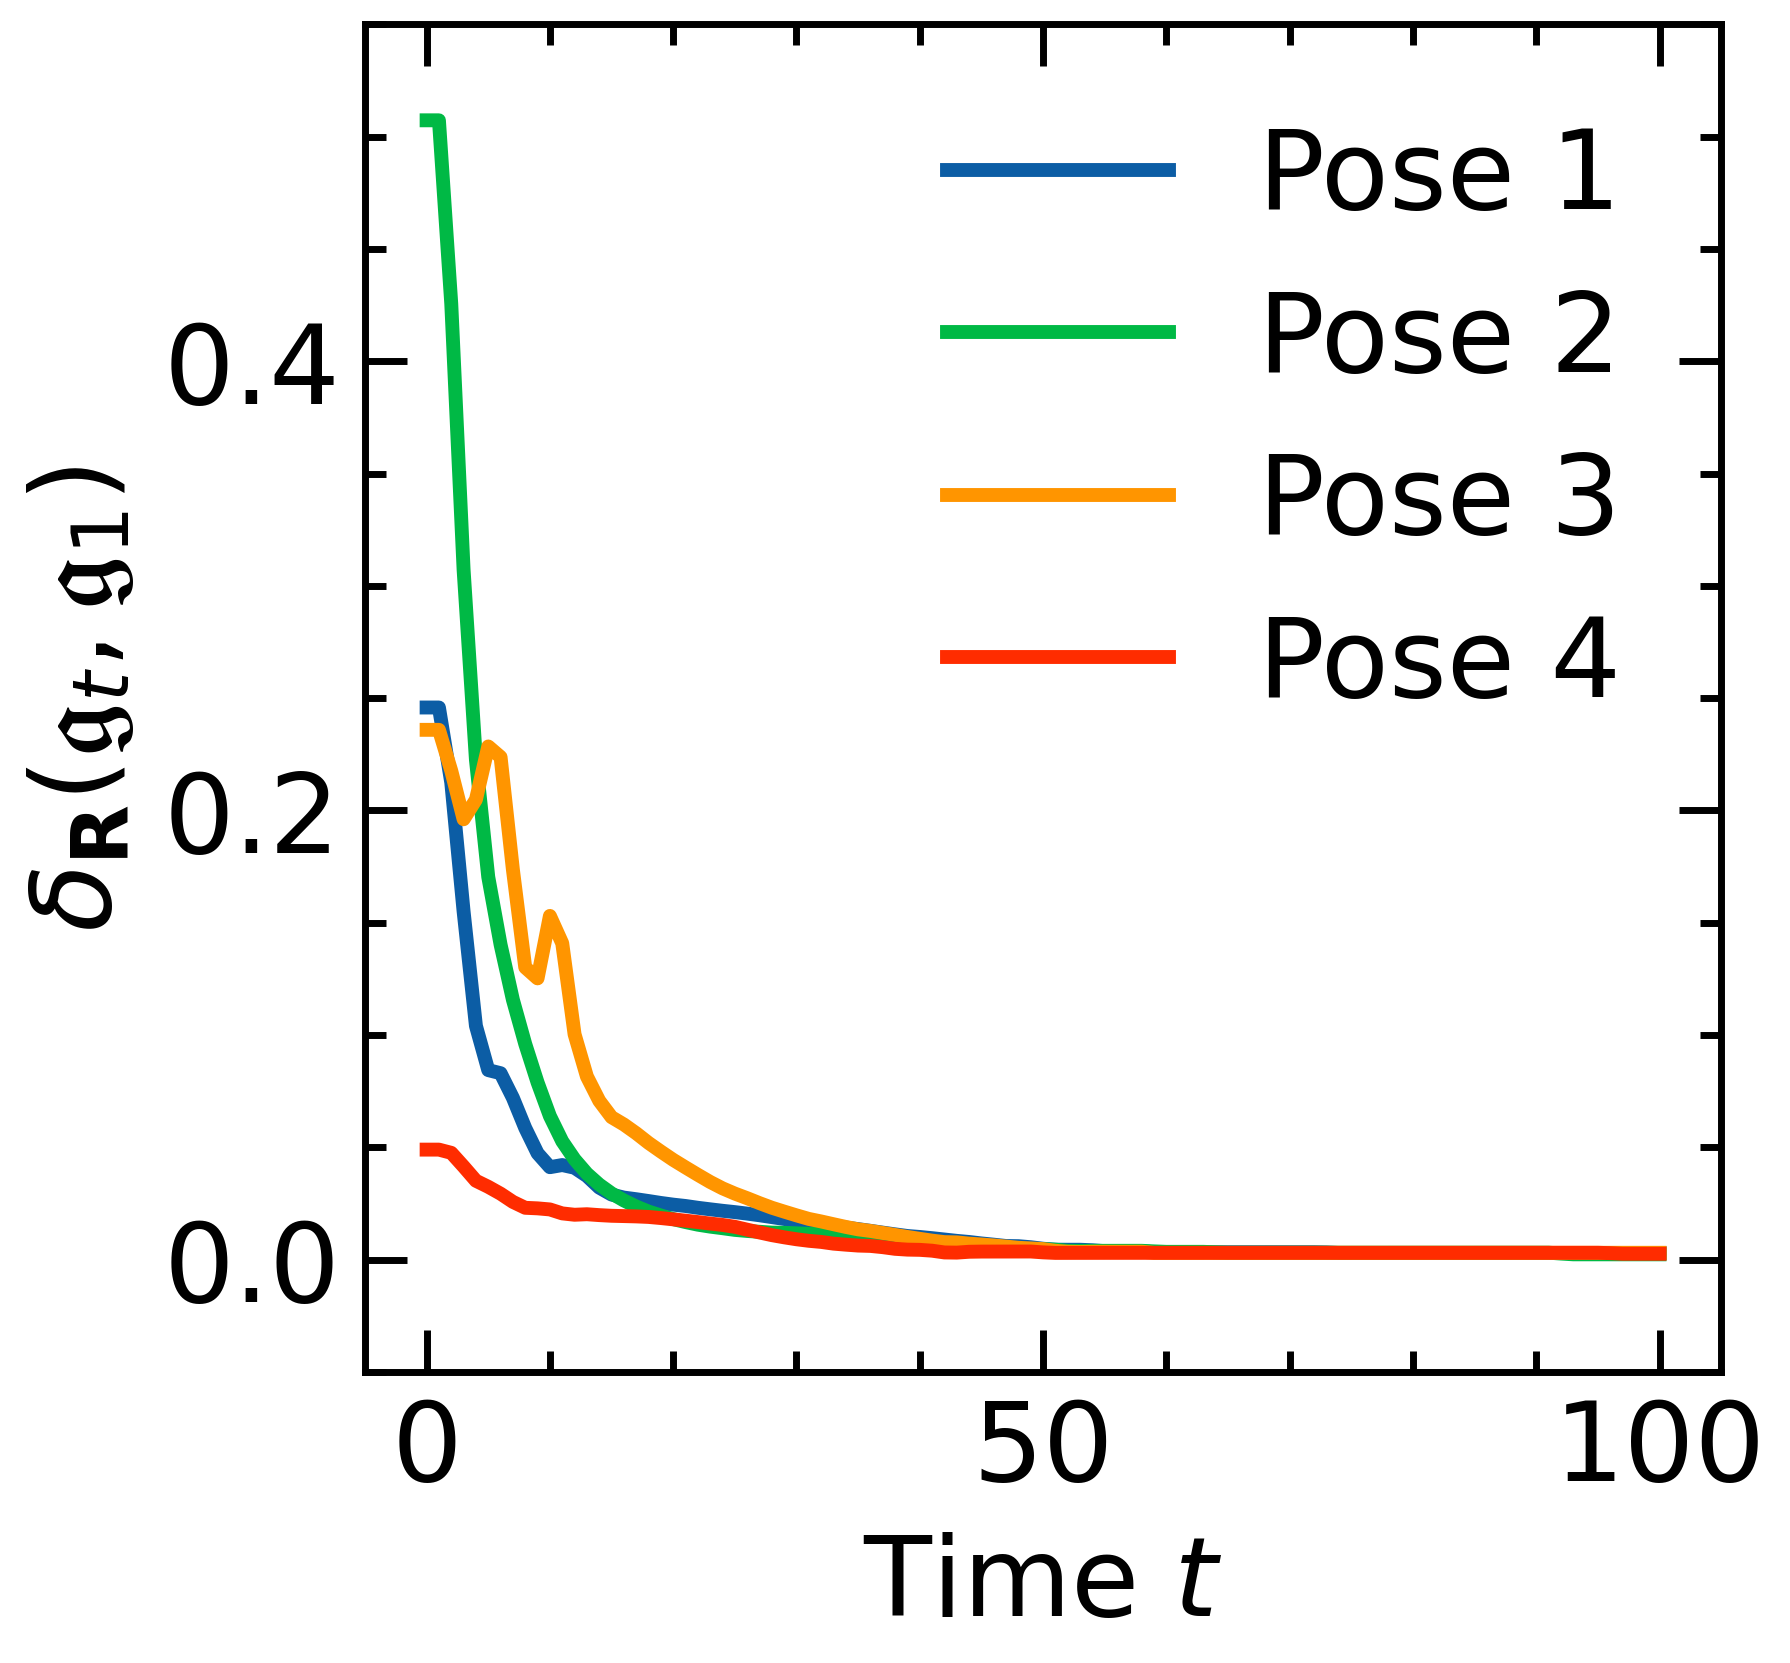

In [4]:
pose_1_rot_errors = pose_1['rot_errors'][0:101]
pose_2_rot_errors = pose_2['rot_errors'][0:101]
pose_3_rot_errors = pose_3['rot_errors'][0:101]
pose_4_rot_errors = pose_4['rot_errors'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.05, 0.55])
plt.xlabel('Time $t$')
plt.ylabel('$\delta_\mathbf{R}(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_rot_errors)
plt.plot(pose_2_rot_errors)
plt.plot(pose_3_rot_errors)
plt.plot(pose_4_rot_errors)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
plt.savefig('rot_error.png', dpi=500)
plt.show()

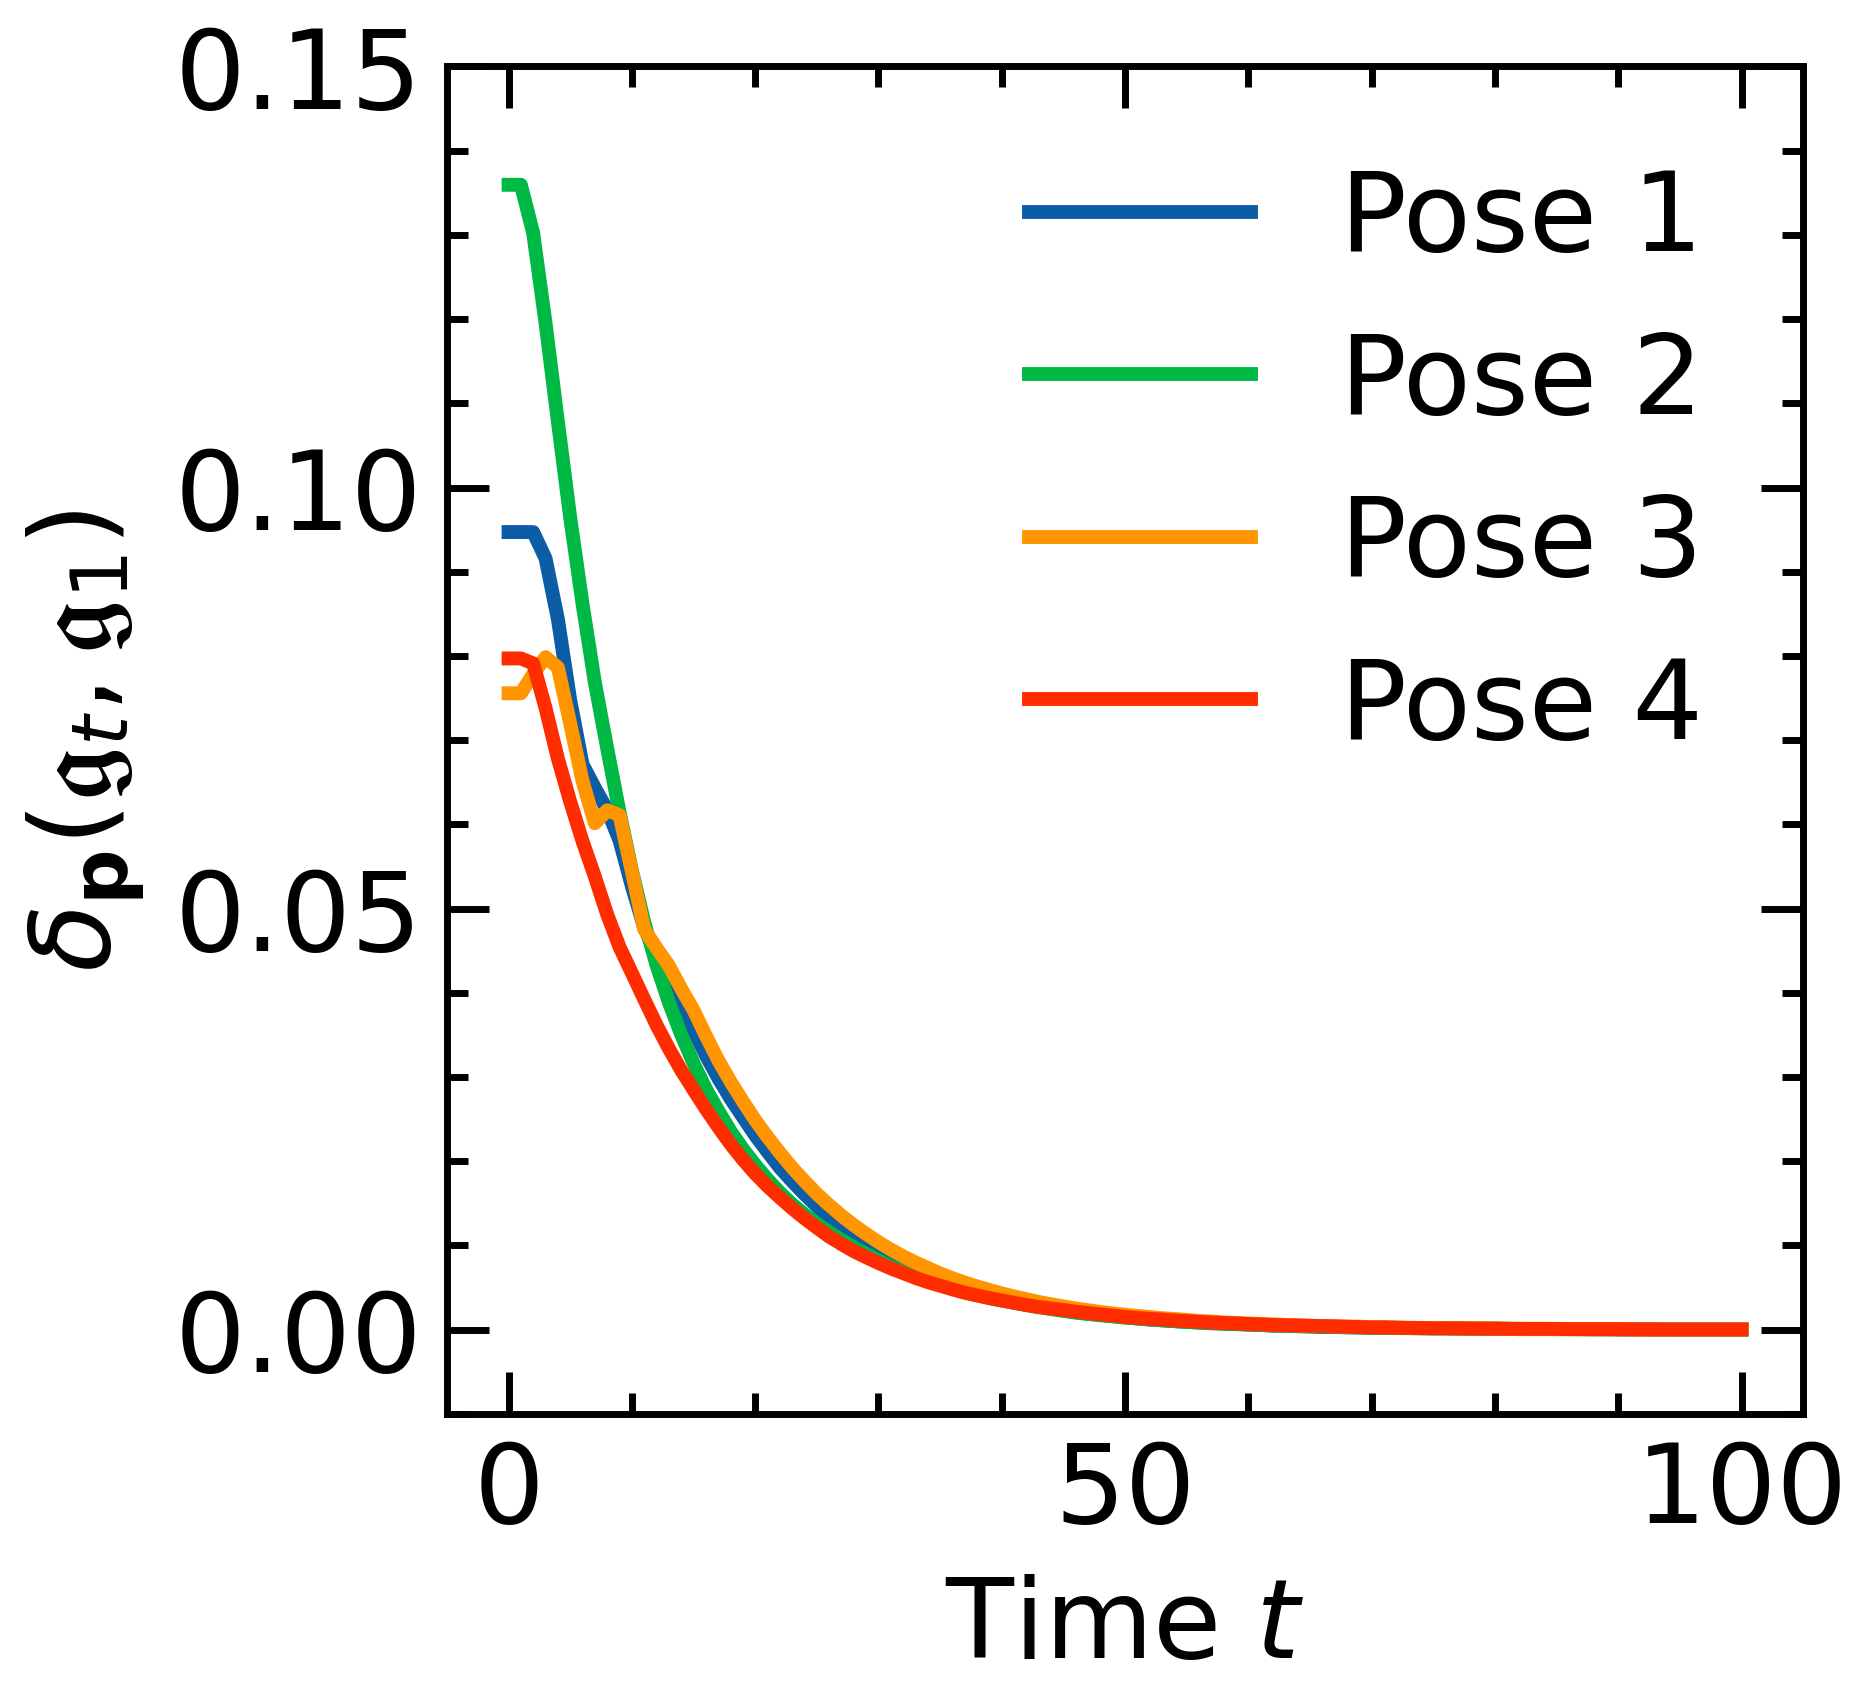

In [5]:
pose_1_pos_errors = pose_1['pos_errors'][0:101]
pose_2_pos_errors = pose_2['pos_errors'][0:101]
pose_3_pos_errors = pose_3['pos_errors'][0:101]
pose_4_pos_errors = pose_4['pos_errors'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.01, 0.15])
plt.xlabel('Time $t$')
plt.ylabel('$\delta_\mathbf{p}(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_pos_errors)
plt.plot(pose_2_pos_errors)
plt.plot(pose_3_pos_errors)
plt.plot(pose_4_pos_errors)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
plt.savefig('pos_error.png', dpi=500)
plt.show()

Next up is plotting the input value $\mathbf{u}$ for the entire sequence. We plot the $\log$ of the value to ensure that the curve is readable by the reader

In [6]:
B = jnp.array([[1,1,1,1,1,1]]).T
B_plus = jnp.linalg.pinv(B)
B_plus, B_plus.shape, B.shape

(Array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]], dtype=float32),
 (1, 6),
 (6, 1))

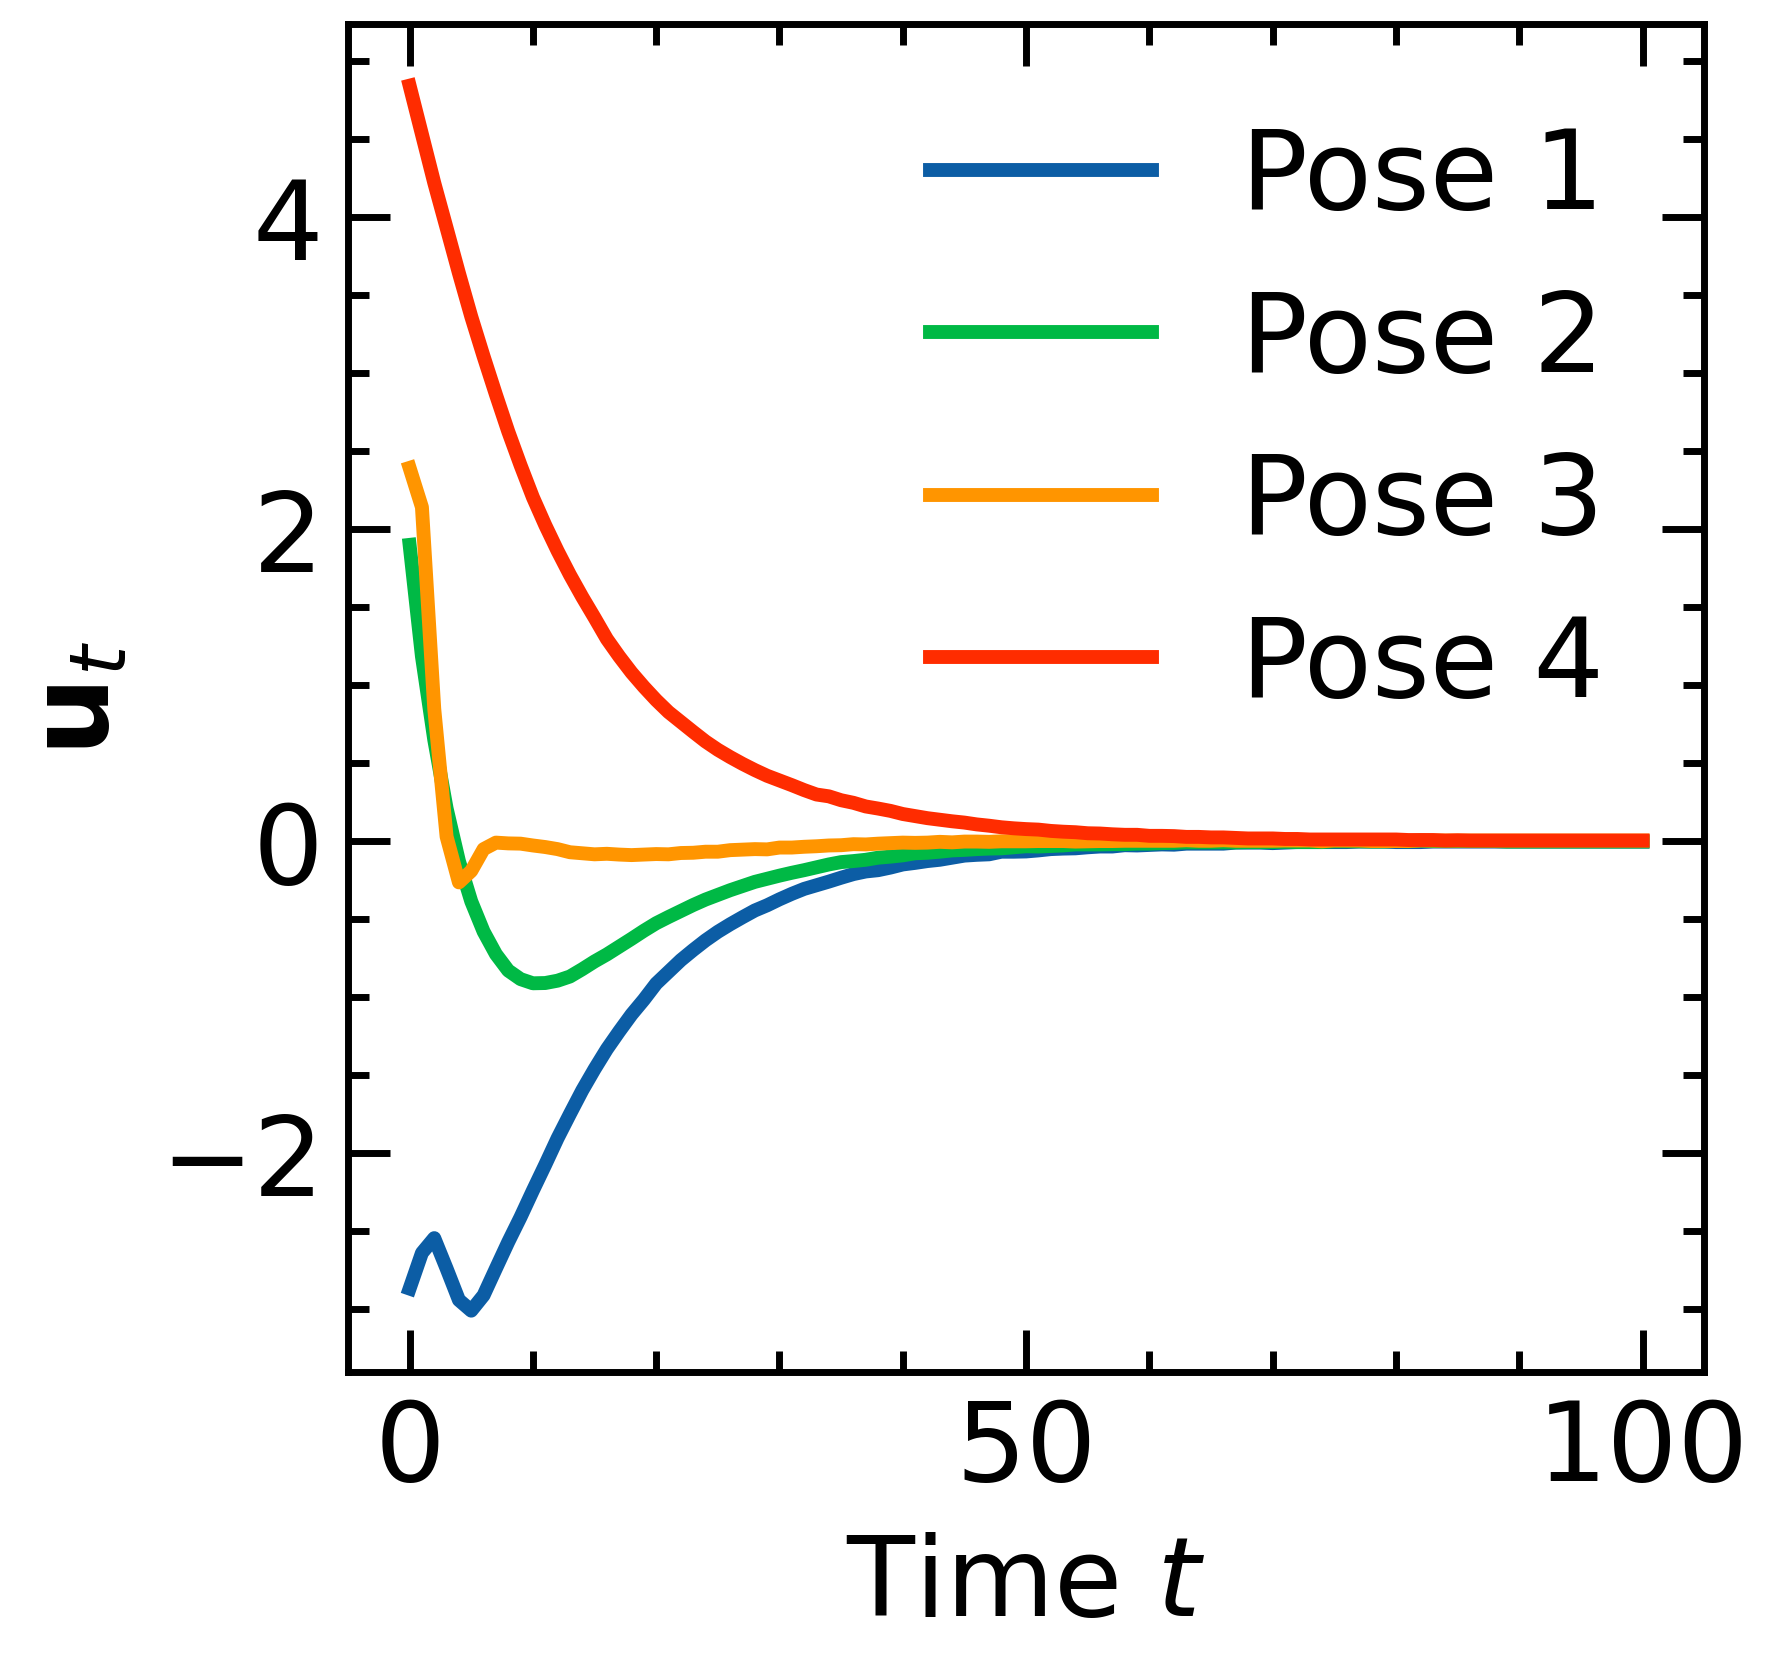

In [7]:
plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.xlabel('Time $t$')
plt.ylabel('$\mathbf{u}_t$')
for pose in poses:
    u = jnp.zeros((200,1))
    cart_vel = pose['cart_vel_val']
    for i in range(u.shape[0]):
        u = u.at[i].set(jnp.array(B_plus @ cart_vel[i]).reshape((1,)))
    plt.plot(u[10:111])
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'], loc="upper right")
plt.savefig('input.png', dpi=500)
plt.show()

Next up we have the Hamiltonian kinetic flow $E_{\mathcal{H}}[t]$. 

In [8]:
E = jnp.zeros((200,1))
pose_momenta = pose_1['momenta']
pose_mass = pose_1['mass_vals']
pose_momenta[0].shape, pose_mass[0].shape


((6, 1), (6, 6))

In [9]:
for i in range(pose_mass.shape[0]):
    E = E.at[i].set(jnp.array(0.5 * pose_momenta[i].T @ jnp.linalg.pinv(pose_mass[i]) @ pose_momenta[i]).reshape((1,)))
E[0:5]

Array([[1.6847505e+11],
       [1.0215277e+05],
       [9.6425305e+04],
       [7.3707914e+04],
       [5.5558465e+04]], dtype=float32)

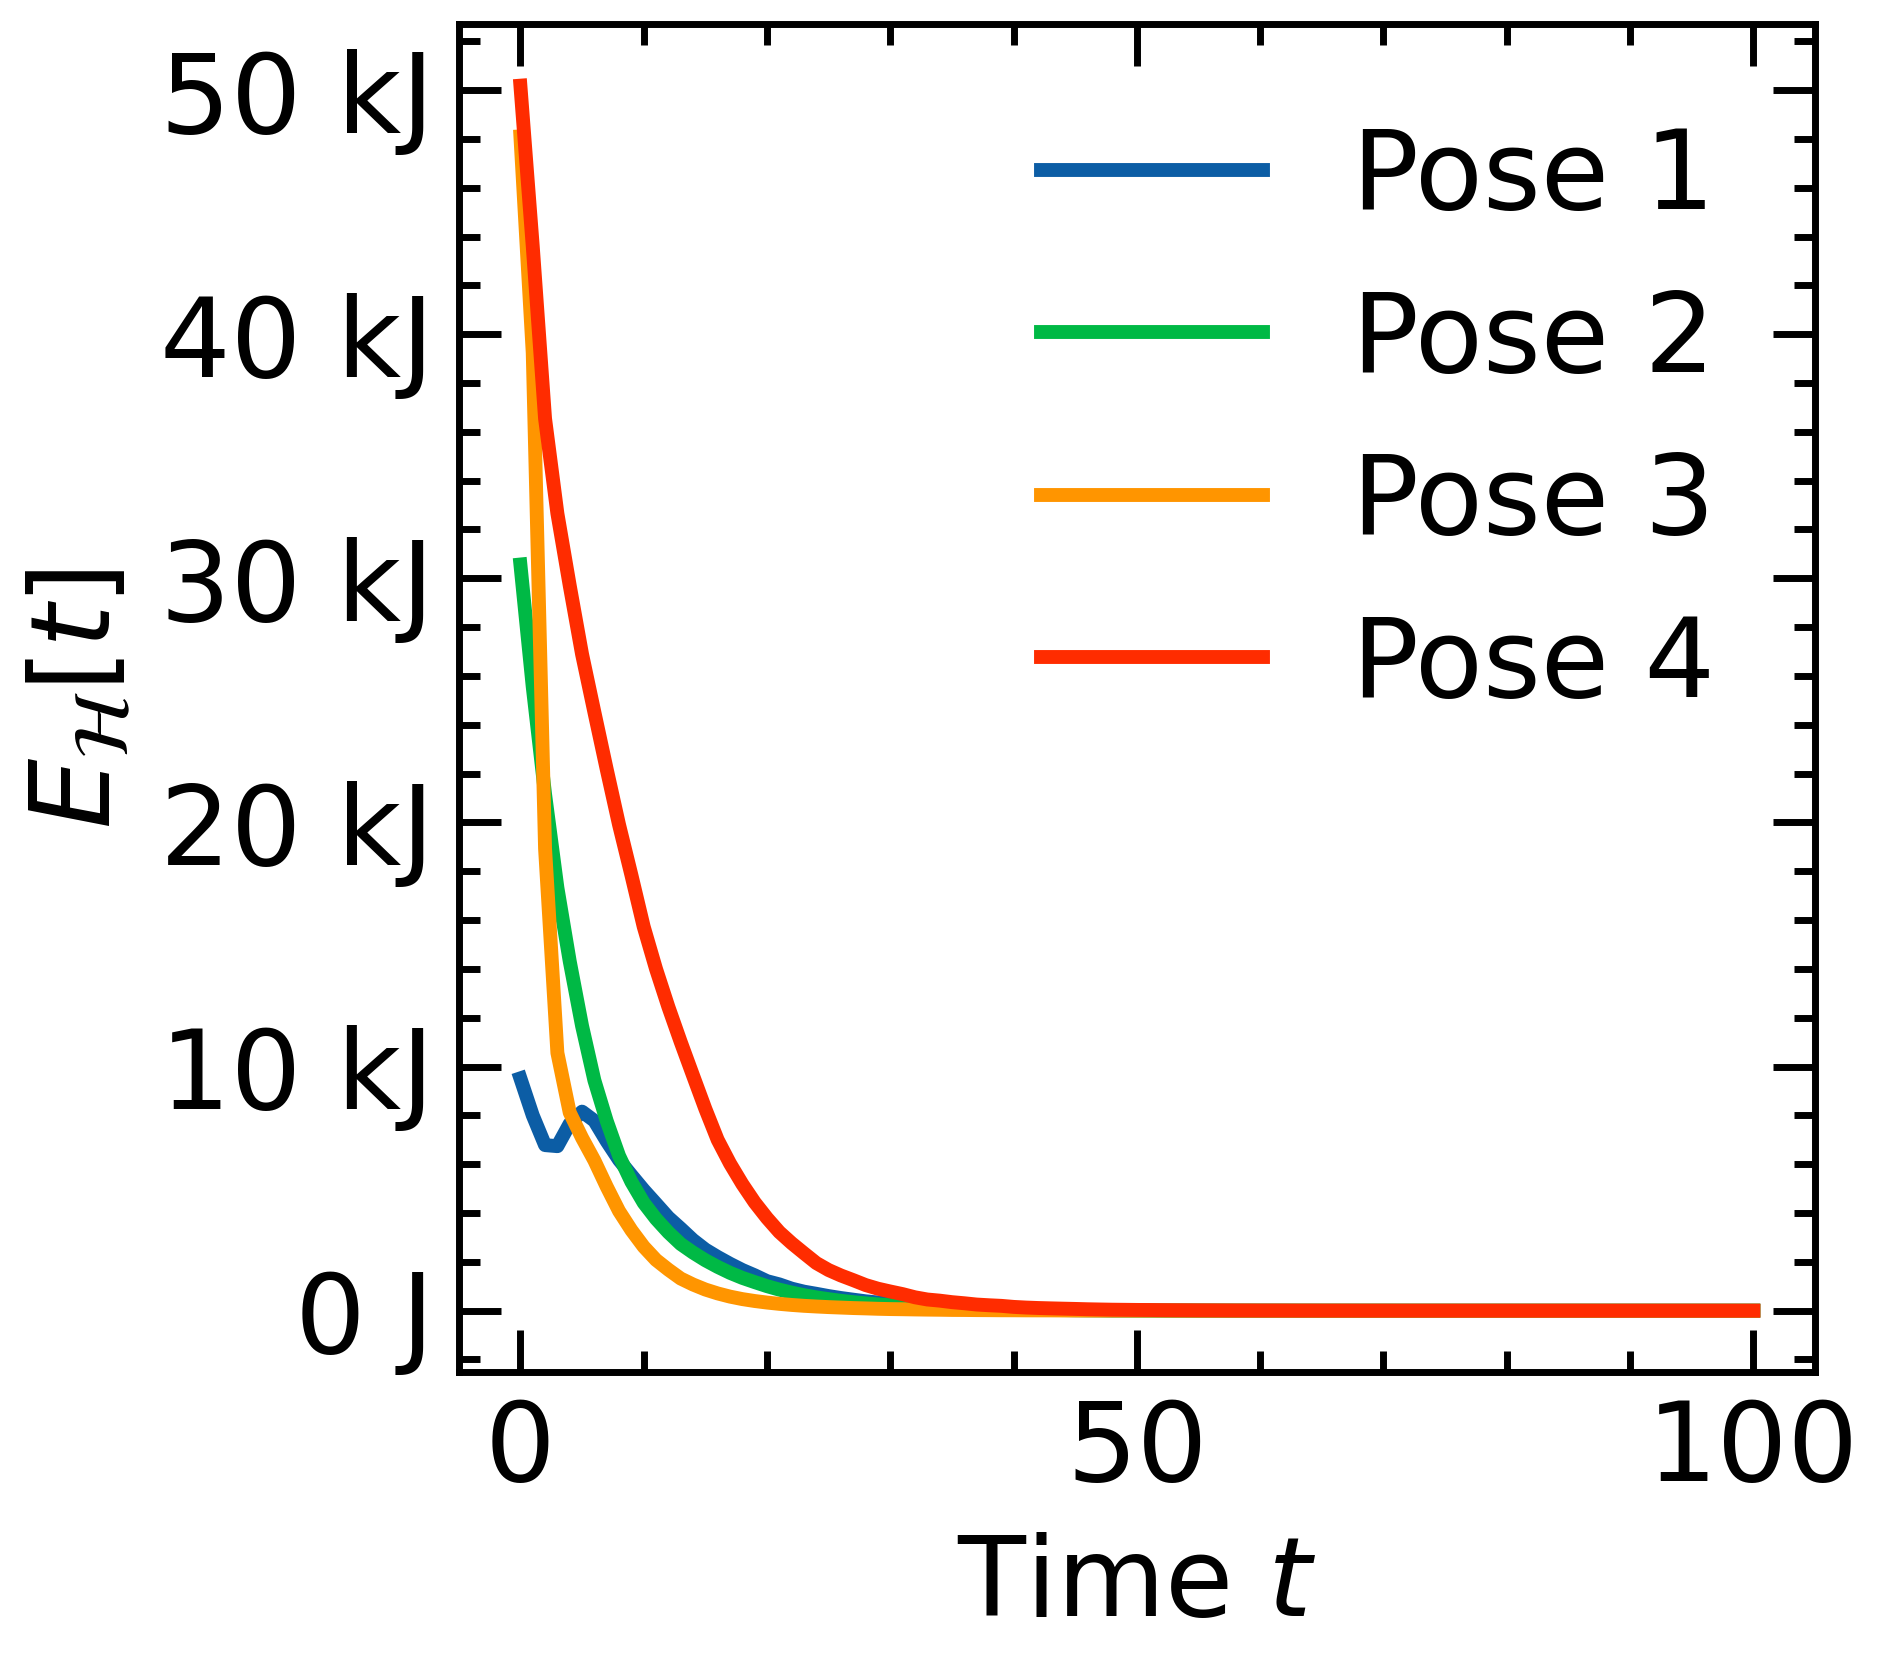

In [10]:
from matplotlib.ticker import EngFormatter

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.xlabel('Time $t$')
ax = plt.gca()
ax.yaxis.set_major_formatter(EngFormatter(unit='J'))
plt.ylabel('$E_{\mathcal{H}}[t]$')
for pose in poses:
    E = jnp.zeros((200,1))
    pose_momenta = pose['momenta']
    pose_mass = pose['mass_vals']
    for i in range(pose_mass.shape[0]):
        E = E.at[i].set(jnp.array(0.5 * pose_momenta[i].T @ jnp.linalg.pinv(pose_mass[i]) @ pose_momenta[i]).reshape((1,)))
    plt.plot(E[10:111])
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'], loc="upper right")
plt.savefig('kinetic.png', dpi=500)
plt.show()